In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from saturation.distributions import *

### Power Law Distribution Sampling

PDF: $ p(x) = C x^b $

CDF = $ \frac{C}{b+1} x^{b + 1} $

In the following, 100,000 uniform random numbers on [0, 1] are transformed to a power law distribution with a slope of -2.8. The cumulative frequency of samples X >= x is plotted on a log-log scale compared to the expectation derived from the CDF. A linear regression is also calculated on the cumulative frequency of samples in log-log scale, and the slope of the the regression is found to match that of the CDF.

In [2]:
slope = -2.8
pdf = PowerLawProbabilityDistribution(slope=slope, min_value=5)

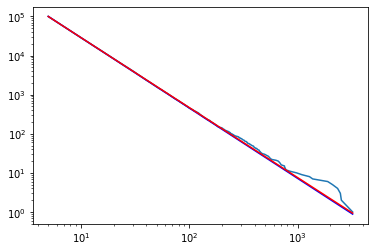

In [3]:
# Plot the CDF
n_samples = 100000
y = np.arange(n_samples, 0, -1)

x = [pdf.uniform_to_value(x) for x in np.random.rand(n_samples)]
x = sorted(x)

plt.plot(x, y)

# Plot the calculated CDF line
line_y = [np.exp(np.log(pdf._constant/(-slope - 1)) + (slope + 1) * np.log(x)) * n_samples for x in x]
plt.plot(x, line_y, 'b')

# Regression line
ln_x = np.reshape(np.log(x), newshape=(len(x), 1))
ln_y = np.log(y)

reg = LinearRegression().fit(ln_x, ln_y)
line_y = [np.exp(reg.intercept_ + reg.coef_ * np.log(x)) for x in x]
plt.plot(x, line_y, 'r')

plt.xscale('log')
plt.yscale('log')

plt.show()

In [4]:
# Regression coefficient - close to the slope of the CDF = -1.8
reg.coef_[0]

-1.7906923132196586